In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [29]:
# Load dataset
df = pd.read_csv('/content/sample_data/Wholesale customers data.csv')

In [30]:
# First 5 rows
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [31]:
# Shape of the dataset
print(f"\nDataset shape: {df.shape}")


Dataset shape: (440, 8)


In [32]:
# Column names and data types
print("\nData Types:")
print(df.dtypes)


Data Types:
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [33]:
# Summary statistics for numeric columns
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000     

In [34]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [10]:
# Check if any categorical variables exist
for col in df.columns:
    unique_vals = df[col].nunique()
    dtype = df[col].dtype
    print(f"Column: {col} | Type: {dtype} | Unique values: {unique_vals}")

Column: Channel | Type: int64 | Unique values: 2
Column: Region | Type: int64 | Unique values: 3
Column: Fresh | Type: int64 | Unique values: 433
Column: Milk | Type: int64 | Unique values: 421
Column: Grocery | Type: int64 | Unique values: 430
Column: Frozen | Type: int64 | Unique values: 426
Column: Detergents_Paper | Type: int64 | Unique values: 417
Column: Delicassen | Type: int64 | Unique values: 403


In [35]:
#droping 'Region' and 'Channel' columns
df = df.drop(['Region', 'Channel'], axis=1)
df.dtypes


,0
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


In [36]:
#Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [37]:
X_scaled

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

Text(0, 0.5, 'WCSS')

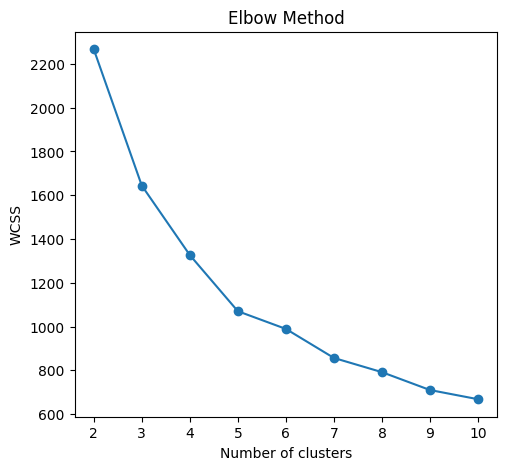

In [40]:
from sklearn.cluster import KMeans
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

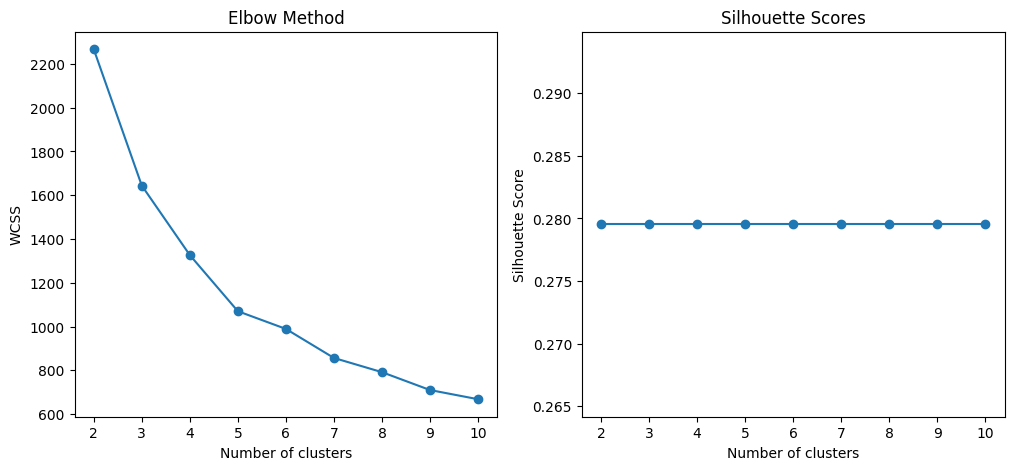

Best number of clusters by silhouette score: 2


In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


plt.subplot(1,2,2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

best_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters by silhouette score: {best_k}")

In [44]:
from sklearn.cluster import AgglomerativeClustering
for k in range(2, 11):
    ahc = AgglomerativeClustering(n_clusters=k)
    labels = ahc.fit_predict(X_scaled)
labels

array([2, 2, 2, 4, 3, 2, 2, 2, 4, 2, 2, 4, 3, 3, 3, 4, 2, 2, 3, 2, 3, 4,
       8, 9, 2, 2, 4, 4, 5, 3, 3, 4, 3, 3, 4, 2, 3, 2, 2, 1, 8, 3, 2, 5,
       2, 5, 2, 0, 2, 5, 4, 4, 3, 2, 3, 4, 5, 2, 4, 2, 2, 0, 2, 2, 4, 5,
       2, 3, 4, 4, 8, 9, 4, 8, 2, 4, 4, 5, 4, 4, 4, 2, 2, 4, 2, 0, 0, 9,
       4, 3, 4, 8, 5, 6, 2, 4, 2, 4, 4, 4, 2, 2, 2, 1, 4, 4, 2, 2, 2, 2,
       4, 2, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 1, 8, 3, 2, 3, 4, 4,
       4, 4, 4, 4, 2, 2, 3, 4, 3, 3, 3, 4, 2, 5, 4, 4, 4, 3, 4, 4, 4, 2,
       4, 5, 2, 4, 2, 2, 2, 4, 4, 5, 2, 2, 2, 4, 4, 4, 2, 5, 2, 5, 4, 2,
       1, 3, 2, 4, 3, 1, 2, 7, 4, 2, 4, 2, 2, 2, 8, 4, 4, 2, 4, 8, 8, 2,
       4, 4, 2, 5, 2, 4, 4, 5, 4, 2, 2, 2, 3, 5, 4, 2, 2, 2, 5, 4, 2, 4,
       4, 2, 4, 4, 4, 4, 3, 4, 4, 4, 8, 2, 3, 4, 3, 4, 4, 4, 4, 1, 8, 3,
       4, 3, 2, 2, 4, 4, 2, 4, 4, 5, 4, 3, 2, 3, 2, 4, 1, 1, 4, 4, 3, 4,
       2, 2, 2, 3, 2, 4, 4, 4, 2, 3, 4, 4, 3, 8, 4, 3, 4, 2, 1, 8, 1, 3,
       4, 8, 4, 3, 4, 4, 4, 2, 3, 4, 4, 2, 2, 4, 3,

Number of clusters: 2, Silhouette Score: 0.7925
Number of clusters: 3, Silhouette Score: 0.2646
Number of clusters: 4, Silhouette Score: 0.2670
Number of clusters: 5, Silhouette Score: 0.2399
Number of clusters: 6, Silhouette Score: 0.2342
Number of clusters: 7, Silhouette Score: 0.2441
Number of clusters: 8, Silhouette Score: 0.2520
Number of clusters: 9, Silhouette Score: 0.2720
Number of clusters: 10, Silhouette Score: 0.2795


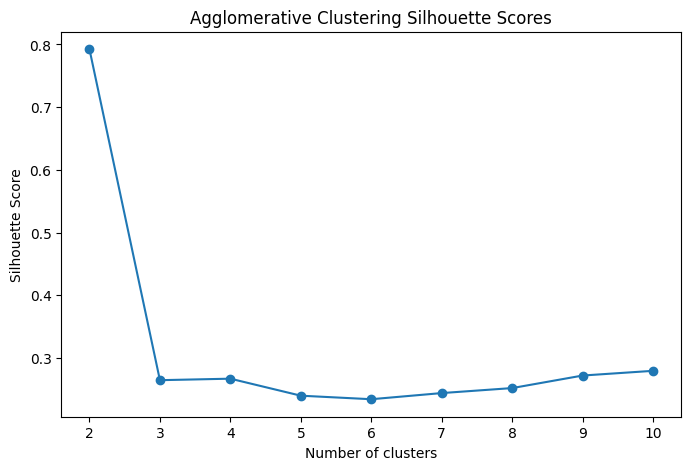

Optimal number of clusters for Agglomerative Clustering: 2


In [46]:
from sklearn.cluster import AgglomerativeClustering

silhouette_scores1 = []

for k in range(2, 11):
    ahc = AgglomerativeClustering(n_clusters=k)
    labels = ahc.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores1.append(score)
    print(f"Number of clusters: {k}, Silhouette Score: {score:.4f}")

# Plot silhouette scores vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores1, marker='o')
plt.title('Agglomerative Clustering Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Best number of clusters based on silhouette score
best_k = range(2, 11)[silhouette_scores1.index(max(silhouette_scores1))]
print(f"Optimal number of clusters for Agglomerative Clustering: {best_k}")

# Fit final model with optimal clusters
ahc_opt = AgglomerativeClustering(n_clusters=best_k)
ahc_labels = ahc_opt.fit_predict(X_scaled)

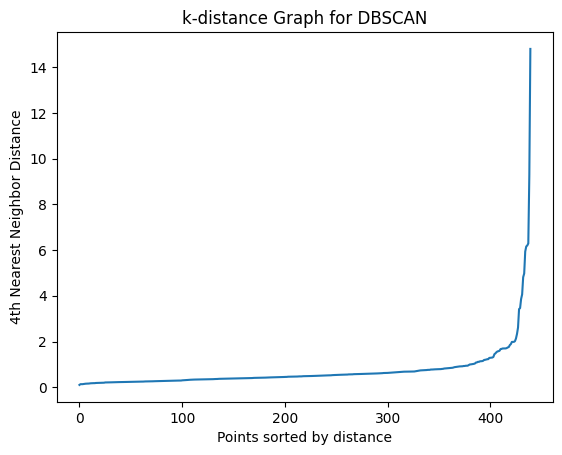

Number of clusters found by DBSCAN: 1
Number of noise points: 27


In [47]:
#DBSCAN Clustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 3])

plt.plot(distances)
plt.title('k-distance Graph for DBSCAN')
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()

# Choose eps from graph, e.g., 1.5
dbscan = DBSCAN(eps=1.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_scaled)

print(f"Number of clusters found by DBSCAN: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")
print(f"Number of noise points: {list(dbscan_labels).count(-1)}")

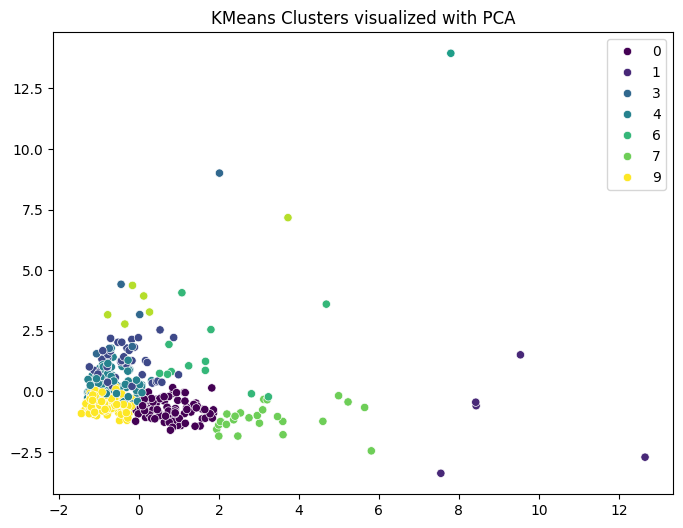

In [51]:
#PCA
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('KMeans Clusters visualized with PCA')
plt.show()